In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
np.random.seed(0)

In [3]:
n_samples = 400

In [4]:
# Feature 1: age (20 to 60)
age = np.random.randint(20,60,n_samples)

In [5]:
# Feature 2: Estimated Salary (20k to 150k)
salary = np.random.randint(20000, 150000, n_samples)

In [6]:
# Target: Purchased (0 or 1)
# Logic: Older people with higher salaries are more likely to buy.
# We create a linear combination and add noise, then threshold it.
threshold = (age * 300) + (salary * 0.5) + np.random.normal(0,1000,  n_samples)
purchased = np.where(threshold > 55000, 1, 0)

In [8]:
df = pd.DataFrame({
    "Age": age,
    "Salary": salary,
    "Purchased" : purchased
})
df.head()

,Age,Salary,Purchased
0,20,45274,0
1,23,102212,1
2,23,51075,0
3,59,143717,1
4,29,132774,1


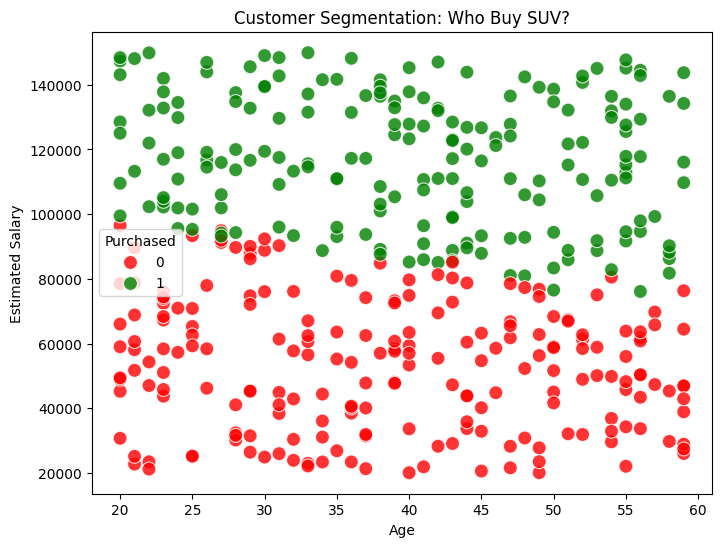

In [10]:
#Visualizing the raw data
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x = "Age", y="Salary", hue='Purchased', palette={0:"red", 1:"green"}, s = 100, alpha=0.8)
plt.title("Customer Segmentation: Who Buy SUV?")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [11]:
df.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [12]:
# Scaling the data because of imbalance features.
X = df[["Age", "Salary"]]
y = df["Purchased"]

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(x_test)

# Training the algorithm
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

print("Model Training is completed")

Model Training is completed


In [15]:
#Predictions and decision boundary.
## let's visualize exactly what the model learned. 
#It learned a Decision Boundary—a line that separates the "Greens" from the "Reds".

from matplotlib.colors import ListedColormap
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                        np.arange(start=X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j, edgecolors='white', s=60)
        
    plt.title(title)
    plt.xlabel('Age (Scaled)')
    plt.ylabel('Salary (Scaled)')
    plt.legend()
    plt.show()


C:\Users\siddhants\AppData\Local\Temp\ipykernel_19912\3188601075.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


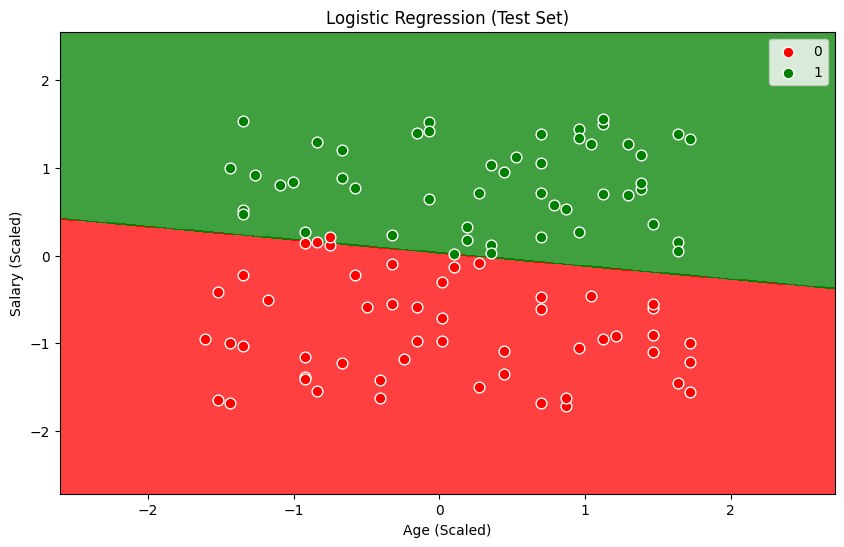

In [16]:
plot_decision_boundary(X_test_scaled, y_test, "Logistic Regression (Test Set)")

Accuracy: 99.00%

Confusion Matrix:
[[50  1]
 [ 0 49]]


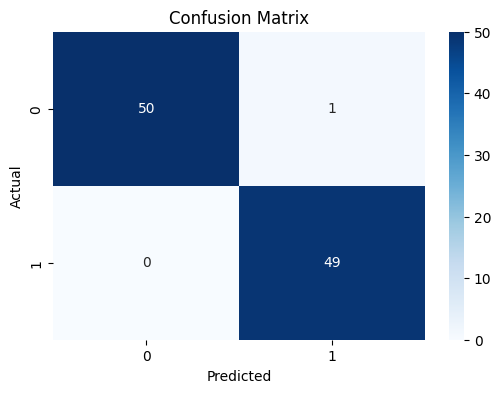

In [17]:
# Make Predictions
y_pred = classifier.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:")
print(cm)

# Let's visualize the Confusion Matrix nicely
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
"""How to Read this Matrix for Business:

True Negatives (Top-Left): We predicted they wouldn't buy, and they didn't. (Good, we saved ad money).

True Positives (Bottom-Right): We predicted they would buy, and they did. (Great, we made a sale!).

False Positives (Top-Right): We thought they would buy, but they didn't. (Wasted ad money).

False Negatives (Bottom-Left): We ignored them, but they actually bought the car elsewhere. (Lost Opportunity - This is usually the most expensive error)."""

"How to Read this Matrix for Business:\n\nTrue Negatives (Top-Left): We predicted they wouldn't buy, and they didn't. (Good, we saved ad money).\n\nTrue Positives (Bottom-Right): We predicted they would buy, and they did. (Great, we made a sale!).\n\nFalse Positives (Top-Right): We thought they would buy, but they didn't. (Wasted ad money).\n\nFalse Negatives (Bottom-Left): We ignored them, but they actually bought the car elsewhere. (Lost Opportunity - This is usually the most expensive error)."